Tema: Clasificación automática de tumores mamarios para la detección temprana de cáncer de mama benigno y maligno

Número de características: 30
Forma del dataset: (569, 30)
Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 16)                496       
                                                                 
 dense_7 (Dense)             (None, 8)                 136       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 641
Trainable params: 641
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
15/15 [==============================] - 1s 25ms/step - loss: 0.6031 - accuracy: 0.7429 - val_loss: 0.5909 - val_accuracy: 0.6930
Epoch 2/100
15/15 [==============================] - 0s 7ms/step - loss: 0.5004 - accuracy: 0.8549 - val_loss: 0.4948 -

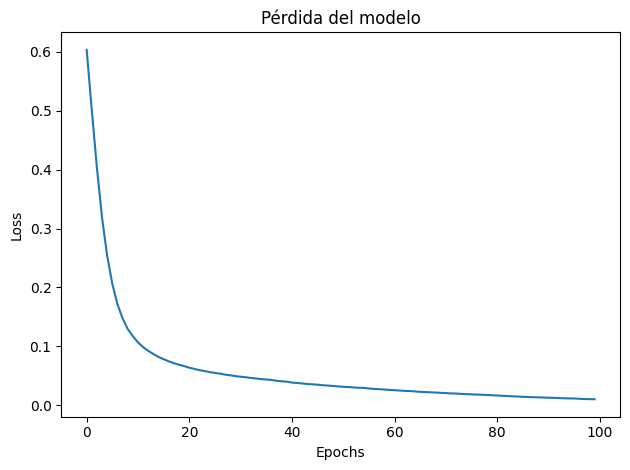

In [4]:
#Importaciones necesarias para el tp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Cargar dataset
data_set = pd.read_csv("breast-cancer.csv", sep=",")

# Limpiar datos
data_set.replace(['NaN', ' '], np.nan, inplace=True)
data_set.dropna(inplace=True)

# Eliminar columna 'id' y mapear diagnóstico a etiquetas binarias
data_set.drop(columns=['id'], inplace=True)
data_set['diagnosis'] = data_set['diagnosis'].map({'M': 1, 'B': 0})

# Separar características y etiquetas
X = data_set.drop(columns='diagnosis')
y = data_set['diagnosis']

print(f"Número de características: {X.shape[1]}")
print(f"Forma del dataset: {X.shape}")

# Normalizar los datos manualmente (importante para redes neuronales)
X_mean = X.mean()
X_std = X.std()
X_scaled = (X - X_mean) / X_std

# Crear modelo
modelo = Sequential()
modelo.add(Dense(16, input_dim=X.shape[1], activation='relu'))
modelo.add(Dense(8, activation='relu'))
modelo.add(Dense(1, activation='sigmoid'))

# Compilar modelo
modelo.compile(loss="binary_crossentropy", 
               optimizer=Adam(learning_rate=0.001),
               metrics=["accuracy"])

modelo.summary()

# Entrenar modelo
history = modelo.fit(X_scaled, y, 
                    epochs=100,
                    batch_size=32, 
                    validation_split=0.2,
                    verbose=1)

# Evaluar modelo en todo el dataset
loss, accuracy = modelo.evaluate(X_scaled, y, verbose=0)
print(f"\nPrecisión del modelo: {accuracy:.4f}")

# Ejemplo de predicción
if X.shape[1] >= 3:
    sample_idx = 0
    nueva_muestra = X_scaled.iloc[sample_idx:sample_idx+1]
    
    probabilidad = modelo.predict(nueva_muestra)[0][0]
    print(f"\nProbabilidad de malignidad: {probabilidad:.4f}")
    print(f"Clasificación: {'Maligno' if probabilidad >= 0.5 else 'Benigno'}")
    print(f"Etiqueta real: {'Maligno' if y.iloc[sample_idx] == 1 else 'Benigno'}")

# Gráfico adaptado al estilo del código de referencia
plt.plot(history.history["loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Pérdida del modelo")
plt.tight_layout()
plt.show()

# Función para hacer predicciones con nuevos datos
def predecir_cancer(modelo, X_mean, X_std, nuevos_datos):
    """
    Función para predecir si un tumor es maligno o benigno
    nuevos_datos: array con todas las características requeridas
    """
    # Normalizar los nuevos datos usando la media y desviación del entrenamiento
    nuevos_datos_scaled = (nuevos_datos - X_mean) / X_std
    probabilidad = modelo.predict(nuevos_datos_scaled.reshape(1, -1))[0][0]
    
    return {
        'probabilidad_malignidad': probabilidad,
        'clasificacion': 'Maligno' if probabilidad >= 0.5 else 'Benigno',
        'confianza': max(probabilidad, 1-probabilidad)
    }